In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
data = pd.read_csv(r'D:\Coding_Dev\College\SEM_6\machine-learning-niit\Assets\breast_cancer_wisconsin_original\breastCancer.csv')
data = data.drop('id', axis=1)
data['Bare Nuclei'] = pd.to_numeric(data['bare_nucleoli'], errors='coerce')
data.dropna(inplace=True)

In [86]:
data

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,Bare Nuclei
0,5,1,1,1,2,1,3,1,1,2,1.0
1,5,4,4,5,7,10,3,2,1,2,10.0
2,3,1,1,1,2,2,3,1,1,2,2.0
3,6,8,8,1,3,4,3,7,1,2,4.0
4,4,1,1,3,2,1,3,1,1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2,2.0
695,2,1,1,1,2,1,1,1,1,2,1.0
696,5,10,10,3,7,3,8,10,2,4,3.0
697,4,8,6,4,3,4,10,6,1,4,4.0


In [87]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_trees = 100
n_features_range = range(2, len(X.columns) + 1)

feature_accuracies = []


for n_features in n_features_range:
    model = RandomForestClassifier(n_estimators=n_trees, max_features=n_features, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    feature_accuracies.append(accuracy)


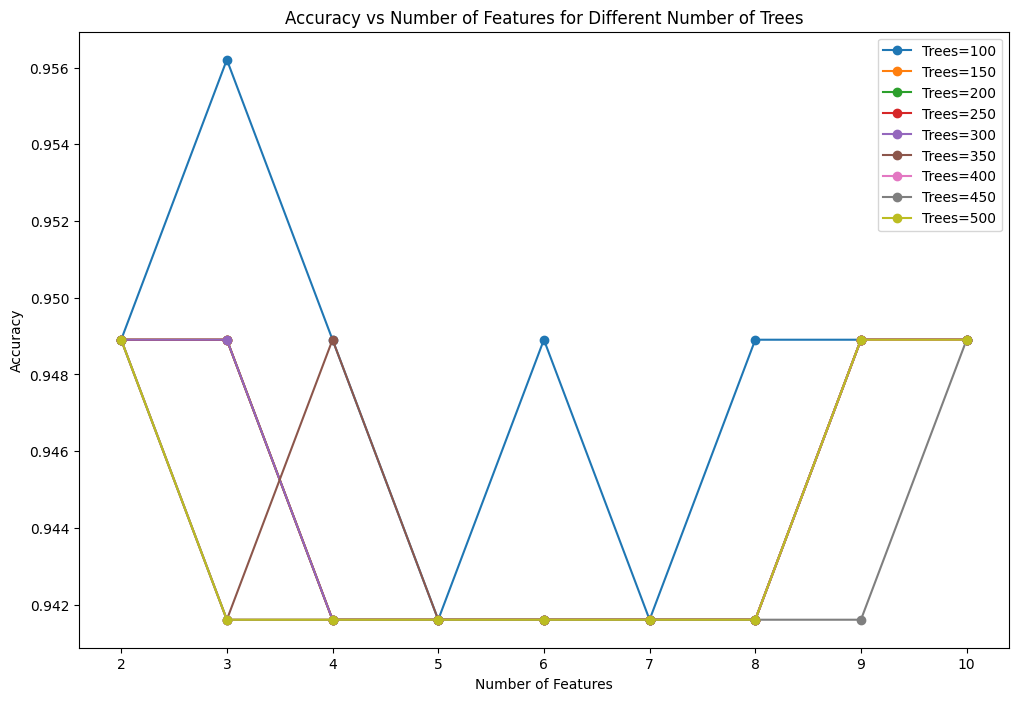

In [107]:
n_trees_range = range(100, 550, 50)

# Define the range of features to test
n_features_range = range(2, len(X.columns) + 1)

# Plotting
plt.figure(figsize=(12, 8))

for n_trees in n_trees_range:
    accuracies = []

    for n_features in n_features_range:
        model = RandomForestClassifier(n_estimators=n_trees, max_features=n_features, oob_score=True, random_state=42)
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.plot(n_features_range, accuracies, marker='o', label=f'Trees={n_trees}')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features for Different Number of Trees')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

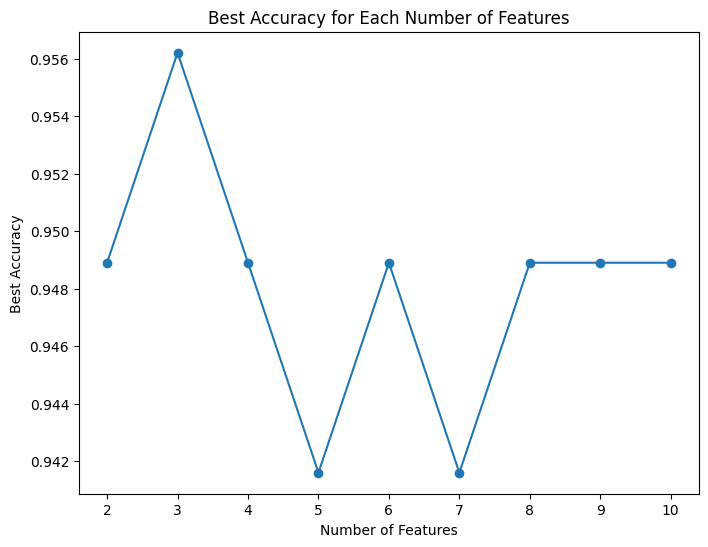

Feature 1: Best Accuracy=0.9489 with 100 trees.
Feature 2: Best Accuracy=0.9562 with 100 trees.
Feature 3: Best Accuracy=0.9489 with 100 trees.
Feature 4: Best Accuracy=0.9416 with 100 trees.
Feature 5: Best Accuracy=0.9489 with 100 trees.
Feature 6: Best Accuracy=0.9416 with 100 trees.
Feature 7: Best Accuracy=0.9489 with 100 trees.
Feature 8: Best Accuracy=0.9489 with 100 trees.
Feature 9: Best Accuracy=0.9489 with 100 trees.


In [108]:
best_accuracies = []
best_n_trees = []

# Plotting
plt.figure(figsize=(12, 8))

for n_features in range(2, len(X.columns) + 1):
    accuracies = []

    for n_trees in n_trees_range:
        model = RandomForestClassifier(n_estimators=n_trees, max_features=n_features, oob_score=True, random_state=42)
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Find the best accuracy and corresponding number of trees for this feature
    best_accuracy_feature = max(accuracies)
    best_n_trees_feature = n_trees_range[accuracies.index(best_accuracy_feature)]

    # Store the best accuracy and number of trees
    best_accuracies.append(best_accuracy_feature)
    best_n_trees.append(best_n_trees_feature)

    # Plot the accuracy for this feature
    # plt.plot(list(n_trees_range), accuracies, marker='o', label=f'Features={n_features}')

# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Number of Trees for Different Number of Features')
# plt.legend()
# plt.show()

# Plot the graph for the best accuracy of each feature versus the number of features
plt.figure(figsize=(8, 6))
plt.plot(range(2, len(X.columns) + 1), best_accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Best Accuracy')
plt.title('Best Accuracy for Each Number of Features')
plt.show()

# Print the best accuracy and corresponding number of trees for each feature
for i, (accuracy, n_trees) in enumerate(zip(best_accuracies, best_n_trees), 1):
    print(f"Feature {i}: Best Accuracy={accuracy:.4f} with {n_trees} trees.")

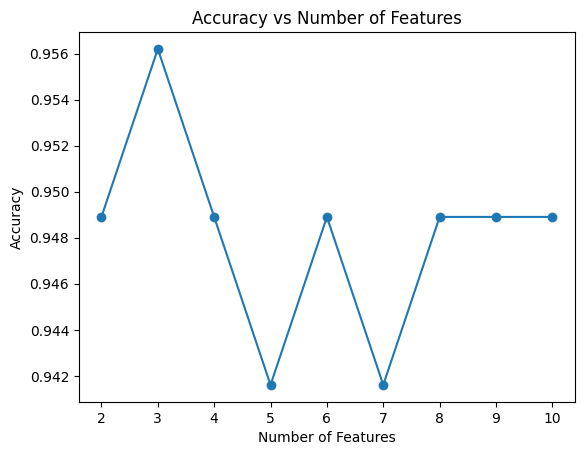

In [94]:
# Plot the graph
plt.plot(n_features_range, feature_accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.show()

In [102]:
print(feature_accuracies)
best_accuracy = max(feature_accuracies)
best_feature = feature_accuracies.index(best_accuracy) + 2
print("Best accurcay: ", best_accuracy)
print("Optimal feature: ", best_feature)

[0.948905109489051, 0.9562043795620438, 0.948905109489051, 0.9416058394160584, 0.948905109489051, 0.9416058394160584, 0.948905109489051, 0.948905109489051, 0.948905109489051]
Best accurcay:  0.9562043795620438
Optimal feature:  3


In [103]:
optimal_features = 7 
optimal_model = RandomForestClassifier(n_estimators=n_trees, max_features=optimal_features, oob_score=True, random_state=42)
optimal_model.fit(X, y)

feature_importance = optimal_model.feature_importances_


In [104]:
feature_importance

array([0.0349091 , 0.42403882, 0.25838322, 0.01808471, 0.03012554,
       0.09639235, 0.02340333, 0.0227637 , 0.00512129, 0.08677795])

In [105]:
from sklearn.feature_selection import mutual_info_classif

mi_values = mutual_info_classif(X, y)


In [106]:
mi_values

array([0.29642711, 0.47814286, 0.46143322, 0.30630577, 0.3518517 ,
       0.40473975, 0.36612104, 0.33673106, 0.14328395, 0.41963292])

   clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0              5.0              1.0               1.0                1.0   
1              5.0              4.0               4.0                5.0   
2              3.0              1.0               1.0                1.0   
3              6.0              8.0               8.0                1.0   
4              4.0              1.0               1.0                3.0   

   epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  \
0              2.0            1.0              3.0              1.0      1.0   
1              7.0           10.0              3.0              2.0      1.0   
2              2.0            2.0              3.0              1.0      1.0   
3              3.0            4.0              3.0              7.0      1.0   
4              2.0            1.0              3.0              1.0      1.0   

   class  Bare Nuclei  
0    2.0          1.0  
1    2.0      

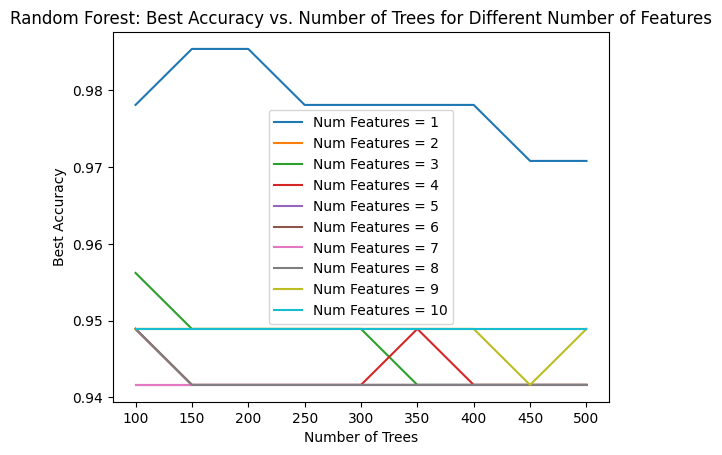

Feature Importance:
{'clump_thickness': 0.041759868836733716, 'size_uniformity': 0.5591368527492403, 'shape_uniformity': 0.18987067992918516, 'marginal_adhesion': 0.016987390967710327, 'epithelial_size': 0.021732116809940017, 'bare_nucleoli': 0.05600592561778051, 'bland_chromatin': 0.019408412662896782, 'normal_nucleoli': 0.025155796498448485, 'mitoses': 0.004735172050969293, 'Bare Nuclei': 0.06520778387709551}

Mutual Information:
{'clump_thickness': 0.3208458870573787, 'size_uniformity': 0.47302598714790167, 'shape_uniformity': 0.4584147045755187, 'marginal_adhesion': 0.3296467661630005, 'epithelial_size': 0.3532418801214108, 'bare_nucleoli': 0.41183362794837497, 'bland_chromatin': 0.3919901866615336, 'normal_nucleoli': 0.31576370559509837, 'mitoses': 0.12174995778615583, 'Bare Nuclei': 0.4053984990799562}

Comparison of Feature Importance and Mutual Information:
                   Feature Importance  Mutual Information
clump_thickness              0.041760            0.320846
size_u

In [112]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'D:\Coding_Dev\College\SEM_6\machine-learning-niit\Assets\breast_cancer_wisconsin_original\breastCancer.csv')
data = data.drop('id', axis=1)
data['Bare Nuclei'] = pd.to_numeric(data['bare_nucleoli'], errors='coerce')
data.dropna(inplace=True)
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print(data.head())

X = data.drop('class', axis=1)
y = data['class']

num_features_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_trees = [100, 150, 200, 250, 300, 350, 400, 450, 500]

for num_features_value in num_features_list:
    best_accuracies = []

    for num_trees_value in num_trees:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the Random Forest model
        model = RandomForestClassifier(n_estimators=num_trees_value, max_features=num_features_value, oob_score=True, random_state=42)
        model.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the best accuracy for each number of trees
        best_accuracies.append((num_trees_value, accuracy))

    # Find the best accuracy for each number of trees
    best_accuracies_df = pd.DataFrame(best_accuracies, columns=['NumTrees', 'Accuracy'])
    best_accuracies_df = best_accuracies_df.groupby('NumTrees').max()['Accuracy']

    # Plot the graph for each number of features
    plt.plot(best_accuracies_df.index, best_accuracies_df.values, label=f'Num Features = {num_features_value}')

plt.xlabel('Number of Trees')
plt.ylabel('Best Accuracy')
plt.title('Random Forest: Best Accuracy vs. Number of Trees for Different Number of Features')
plt.legend()
plt.show()


# Use the optimal number of features from the last graph
optimal_num_features = best_accuracies_df.idxmax()

# Train the model with optimal_num_features
optimal_model = RandomForestClassifier(n_estimators=optimal_num_features, max_features=optimal_num_features, oob_score=True, random_state=42)
optimal_model.fit(X, y)

# Feature Importance using OOB samples
feature_importance = optimal_model.feature_importances_

# Mutual Information
mi_values = mutual_info_classif(X, y)

# Display results
print("Feature Importance:")
print(dict(zip(X.columns, feature_importance)))

print("\nMutual Information:")
print(dict(zip(X.columns, mi_values)))

# Compare the results
feature_importance_comparison = pd.DataFrame({'Feature Importance': feature_importance, 'Mutual Information': mi_values}, index=X.columns)
print("\nComparison of Feature Importance and Mutual Information:")
print(feature_importance_comparison)

# Check if the two lists are identical
are_identical = feature_importance.tolist() == mi_values.tolist()
# print("\nAre the two lists identical? ", are_identical)

# Check correlation
correlation = feature_importance_comparison['Feature Importance'].corr(feature_importance_comparison['Mutual Information'])
print("\nCorrelation between Feature Importance and Mutual Information: ", correlation)